## Goal
- Find out where do they travel most
- How developed the passenger count over the years?
- Is there specific airline that used most?


### 0.EDA
1. Are there busy season?
Methodology:
Look up total passenger count per month
 
2. Has passenger count been increased?
Methodology:
Yearly total passenger count

3. Most popular airline
Methodology:
Group by airline and sum total passenger count

4. Low cost vs non-low cost using population
Methodology:
Group by cost category and show as pie chart

### 1. Trend of International Destination
- Domestic and international over the time distribution
Methodology:
Calculate passenger count of domestic and international as percentage per year

- Where do they have been traveled most? 
Methodology:
In international regions, find out top 5 regions by summing passenger count

- Is there difference of destinations per month?
Methodology:
Average monthly passenger count for top 5 regions

### 2. Airline Usage
- Which terminal, boarding area have been most used?
Methodology:
Find out terminal and boarding area per passenger count : sum
Monthly usage as in average for busy terminal and boarding area

- Which airline provides low-fare and where is the destination?
Methodology:
Filter airline that provides low-fare and calculate total passenger count per destination(region) 


### 3. Trend of Domestic Flights
- Monthly trend
Methodology:
Monthly passenger average per month

- Yearly trend
Methodology:
Total usage of domestic flight, Sum passenger count per year

- Used Airline distribution
Methodology:
Each airline that used for domestic flight yearly trend

- Price category trend
Methodology:
low and non-low fare yearly trend in US


Import libraries and data, created new date type columns for analysis. 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.ticker import PercentFormatter, FuncFormatter
import matplotlib.ticker as ticker

df = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\10_SFO_airtraffic\workingsheet.csv')

sns.set_style('ticks')

df['date']=pd.to_datetime(df['Activity Period Start Date']) # yyyy-mm data
df['month']=df['date'].dt.month # mm data
df['year']=df['date'].dt.year # yyyy data

1. Are there busy season?
Methodology:
Look up total passenger count per month

Grouped Dataframe by 'month' to find out monthly data, and calculated average passenger count per month.


Text(0.5, 0, 'Month')

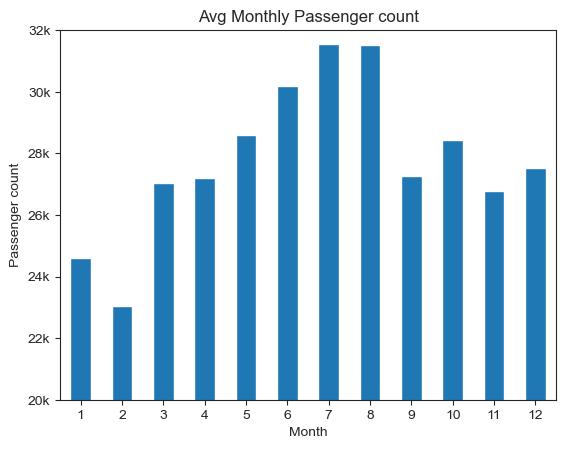

In [32]:
df.groupby('month')['Passenger Count'].mean().plot(kind='bar')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.gca().tick_params(axis='x', rotation=0)
plt.ylim(20000,32000)
plt.title('Avg Monthly Passenger count')
plt.ylabel('Passenger count')
plt.xlabel('Month')

- February has lowest passenger as 23,000, and July and August have most passengers as more than 31,000.

2. Has passenger count been increased?
Methodology:
Yearly total passenger count


Calculated total passenger number per month from 1999 to 2025. For better visualization, applied `rolling` function.

In [37]:
df_monthly = df.groupby('date')['Passenger Count'].sum().rolling(window=12, min_periods=1).mean()

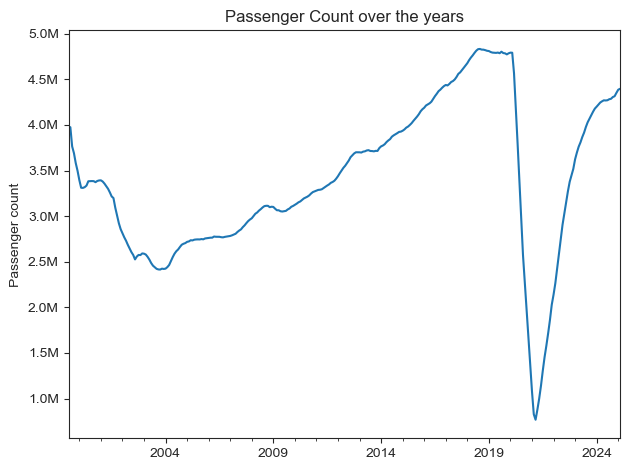

In [38]:

df_monthly.plot()
plt.title('Passenger Count over the years')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.1f}M'))
plt.ylabel('Passenger count')
plt.xlabel('')

plt.tight_layout()
plt.show()

Since 2004 passenger has been steadily increased, and after the pandemic slowly recovering.


3. Most popular airline
Methodology:
Group by airline and sum total passenger count


Grouped Dataframe by airline and calculated total number of passenger.
To show top 10 airlines, sorted value descending and limited to 10 rows, displayed using horizontal bar chart.

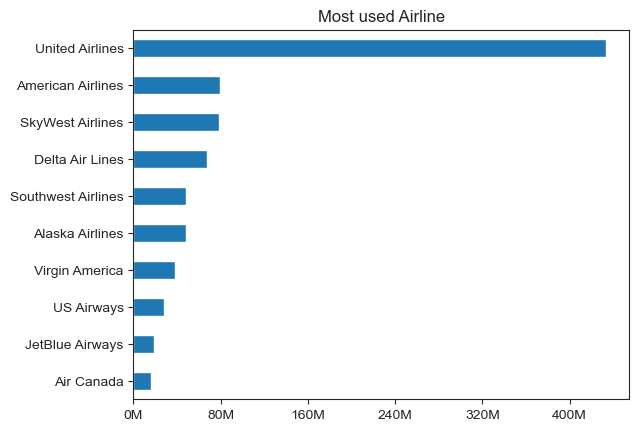

In [39]:
df.groupby('Operating Airline')['Passenger Count'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(7))
plt.title('Most used Airline')
plt.gca().invert_yaxis()
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.0f}M'))

United Airline is most popular airline in SFO as more than 400M population has used

4. Low cost vs non-low cost using population
Methodology:
Group by cost category and show as pie chart

Grouped Dataframe by price category and calculated total number of passenger.
Show using pie chart.

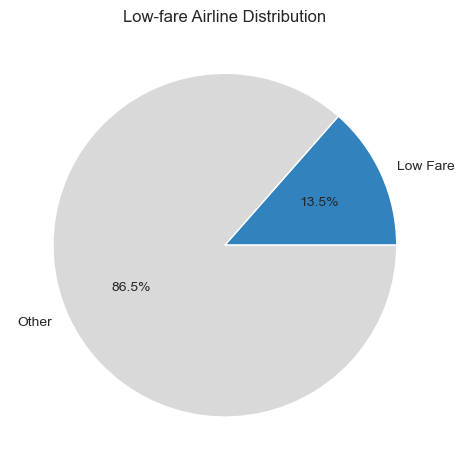

In [48]:
df.groupby('Price Category Code')['Passenger Count'].sum().plot(kind='pie',ylabel='',colormap='tab20c',
                                                                autopct='%1.1f%%', startangle=0)
plt.title('Low-fare Airline Distribution')
plt.tight_layout()
plt.show()